## Lending Club Loan Data Analysis     ||      Niladri Sekhar Sardar
### Project 2 

#### DESCRIPTION

Create a model that predicts whether or not a loan will be default using the historical data.

#### Problem Statement:  

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.

#### Domain: Finance

Analysis to be done: Perform data preprocessing and build a deep learning prediction model.  

#### Steps to perform:

Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

#### Tasks:

1.     Feature Transformation

Transform categorical values into numerical values (discrete)

2.     Exploratory data analysis of different factors of the dataset.

3.     Additional Feature Engineering

You will check the correlation between features and will drop those features which have a strong correlation

This will help reduce the number of features and will leave you with the most relevant features

4.     Modeling

After applying EDA and feature engineering, you are now ready to build the predictive models

In this part, you will create a deep learning model using Keras with Tensorflow backend

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from pickle import dump, load

%matplotlib inline

In [2]:
df = pd.read_csv('loan_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [6]:
#Transform categorical values into numerical values
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,purpose
0,debt_consolidation
1,credit_card
2,debt_consolidation
3,debt_consolidation
4,credit_card


In [7]:
obj_df["purpose"].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [8]:
obj_df = obj_df.fillna({"purpose" : "credit_card"})
cleanup_nums = {"purpose": {"credit_card": 1,"debt_consolidation": 2 }}
obj_df=obj_df.replace(cleanup_nums)
obj_df.head()

,purpose
0,2
1,1
2,2
3,2
4,1


In [9]:
df['not.fully.paid'].isnull().mean()
df.groupby('not.fully.paid')['not.fully.paid'].count()/len(df)

not.fully.paid
0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64

<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

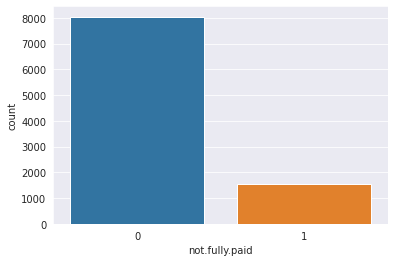

In [10]:
sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid', data=df)

Random over-sampling:
1    8045
0    8045
Name: not.fully.paid, dtype: int64


<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

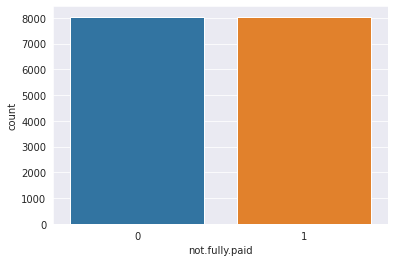

In [11]:
count_class_0, count_class_1 = df['not.fully.paid'].value_counts()
df_0 = df[df['not.fully.paid'] == 0]
df_1 = df[df['not.fully.paid'] == 1]
df_1_over = df_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_0, df_1_over], axis=0)
print('Random over-sampling:')
print(df_test_over['not.fully.paid'].value_counts())

sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid', data=df_test_over)

Text(0.5, 0, 'FICO')

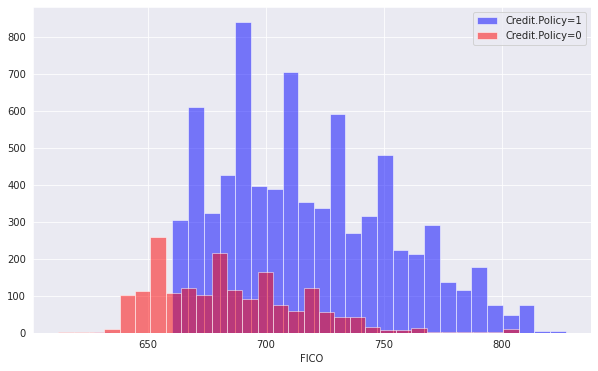

In [12]:
#EDA
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

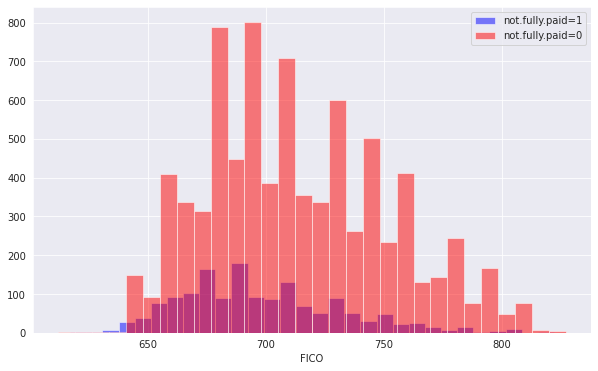

In [13]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<AxesSubplot:xlabel='purpose', ylabel='count'>

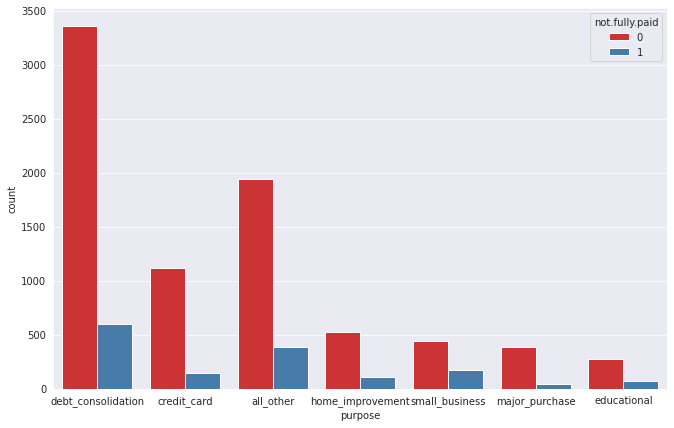

In [14]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=df,palette='Set1')

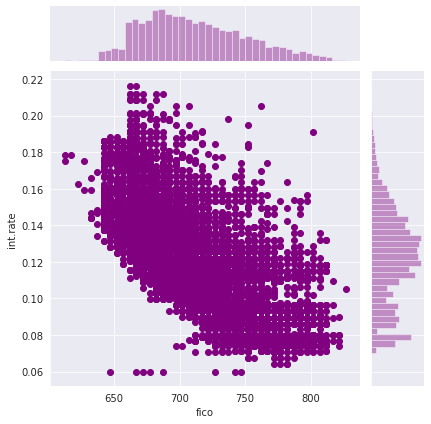

In [15]:
sns.jointplot(x='fico',y='int.rate',data=df,color='purple')

<Figure size 792x504 with 0 Axes>

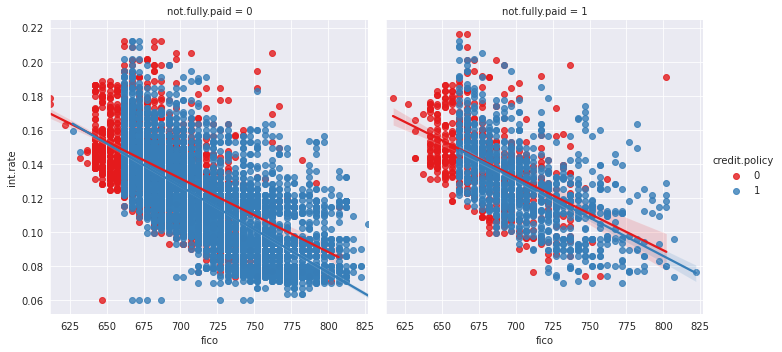

In [16]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',col='not.fully.paid',palette='Set1')

In [17]:
loan_num = df.select_dtypes(include = ['float64','int64'])
loan_num.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


array([[<AxesSubplot:title={'center':'credit.policy'}>,
        <AxesSubplot:title={'center':'days.with.cr.line'}>,
        <AxesSubplot:title={'center':'delinq.2yrs'}>,
        <AxesSubplot:title={'center':'dti'}>],
       [<AxesSubplot:title={'center':'fico'}>,
        <AxesSubplot:title={'center':'inq.last.6mths'}>,
        <AxesSubplot:title={'center':'installment'}>,
        <AxesSubplot:title={'center':'int.rate'}>],
       [<AxesSubplot:title={'center':'log.annual.inc'}>,
        <AxesSubplot:title={'center':'not.fully.paid'}>,
        <AxesSubplot:title={'center':'pub.rec'}>,
        <AxesSubplot:title={'center':'revol.bal'}>],
       [<AxesSubplot:title={'center':'revol.util'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

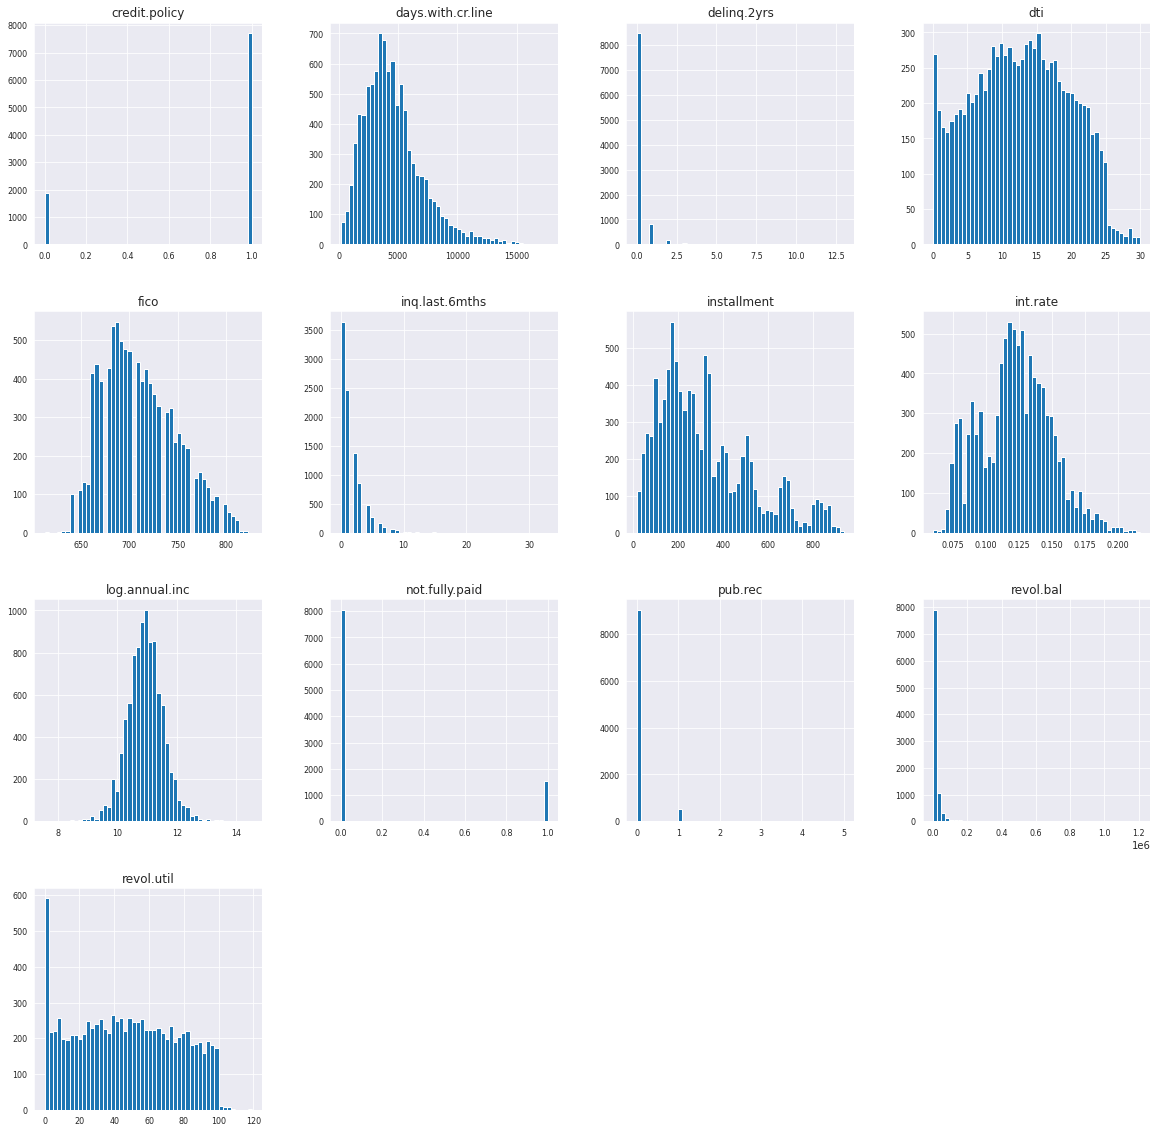

In [18]:
loan_num.hist(figsize=(20,20), bins=50, xlabelsize=8, ylabelsize=8)

In [19]:
loan_num_corr = loan_num.corr()['int.rate'][:-1] # -1 because the latest row is SalePrice
golden_features_list = loan_num_corr[abs(loan_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with rate:\n{}".format(len(golden_features_list), golden_features_list))

There is 2 strongly correlated values with rate:
int.rate    1.000000
fico       -0.714821
Name: int.rate, dtype: float64


In [20]:
#correlation
cor_matrix = df.corr().abs()
print(cor_matrix)

                   credit.policy  int.rate  installment  log.annual.inc  \
credit.policy           1.000000  0.294089     0.058770        0.034906   
int.rate                0.294089  1.000000     0.276140        0.056383   
installment             0.058770  0.276140     1.000000        0.448102   
log.annual.inc          0.034906  0.056383     0.448102        1.000000   
dti                     0.090901  0.220006     0.050202        0.054065   
fico                    0.348319  0.714821     0.086039        0.114576   
days.with.cr.line       0.099026  0.124022     0.183297        0.336896   
revol.bal               0.187518  0.092527     0.233625        0.372140   
revol.util              0.104095  0.464837     0.081356        0.054881   
inq.last.6mths          0.535511  0.202780     0.010419        0.029171   
delinq.2yrs             0.076318  0.156079     0.004368        0.029203   
pub.rec                 0.054243  0.098162     0.032760        0.016506   
not.fully.paid          0

In [21]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                   credit.policy  int.rate  installment  log.annual.inc  \
credit.policy                NaN  0.294089      0.05877        0.034906   
int.rate                     NaN       NaN      0.27614        0.056383   
installment                  NaN       NaN          NaN        0.448102   
log.annual.inc               NaN       NaN          NaN             NaN   
dti                          NaN       NaN          NaN             NaN   
fico                         NaN       NaN          NaN             NaN   
days.with.cr.line            NaN       NaN          NaN             NaN   
revol.bal                    NaN       NaN          NaN             NaN   
revol.util                   NaN       NaN          NaN             NaN   
inq.last.6mths               NaN       NaN          NaN             NaN   
delinq.2yrs                  NaN       NaN          NaN             NaN   
pub.rec                      NaN       NaN          NaN             NaN   
not.fully.paid           

In [22]:
col_fea = ['purpose']
final_data = pd.get_dummies(df_test_over,columns=col_fea,drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16090 entries, 0 to 6489
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               16090 non-null  int64  
 1   int.rate                    16090 non-null  float64
 2   installment                 16090 non-null  float64
 3   log.annual.inc              16090 non-null  float64
 4   dti                         16090 non-null  float64
 5   fico                        16090 non-null  int64  
 6   days.with.cr.line           16090 non-null  float64
 7   revol.bal                   16090 non-null  int64  
 8   revol.util                  16090 non-null  float64
 9   inq.last.6mths              16090 non-null  int64  
 10  delinq.2yrs                 16090 non-null  int64  
 11  pub.rec                     16090 non-null  int64  
 12  not.fully.paid              16090 non-null  int64  
 13  purpose_credit_card         1609

In [23]:
final_data.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
credit.policy,1.000000,-0.293235,0.056004,0.013883,-0.095990,0.380551,0.097688,-0.181997,-0.110055,-0.536704,-0.065907,-0.059425,-0.195141,0.005062,0.038549,-0.021212,-0.005854,0.025203,-0.000886
int.rate,-0.293235,1.000000,0.260051,0.084109,0.204829,-0.682940,-0.102395,0.085281,0.422599,0.180521,0.142673,0.104874,0.220622,-0.040491,0.077776,-0.025567,-0.046993,-0.062519,0.185029
installment,0.056004,0.260051,1.000000,0.474701,0.026566,0.114381,0.182484,0.247424,0.058636,-0.025737,-0.003840,-0.028678,0.066078,0.014128,0.099938,-0.085003,0.031125,-0.044420,0.186379
log.annual.inc,0.013883,0.084109,0.474701,1.000000,-0.032079,0.102206,0.338230,0.379965,0.081498,0.033728,0.017837,0.008396,-0.028903,0.071238,-0.039195,-0.104444,0.114443,-0.018235,0.116249
dti,-0.095990,0.204829,0.026566,-0.032079,1.000000,-0.222160,0.094969,0.166686,0.323525,0.028834,-0.039725,0.014127,0.044245,0.071261,0.177363,-0.035056,-0.086990,-0.084316,-0.055405
fico,0.380551,-0.682940,0.114381,0.102206,-0.222160,1.000000,0.260499,0.007158,-0.499787,-0.188012,-0.202630,-0.158321,-0.211322,-0.010900,-0.135483,-0.002997,0.094269,0.062190,0.067492
days.with.cr.line,0.097688,-0.102395,0.182484,0.338230,0.094969,0.260499,1.000000,0.247343,0.012708,-0.028873,0.081416,0.064661,-0.036292,0.053615,-0.003803,-0.044906,0.074033,-0.030162,0.045082
revol.bal,-0.181997,0.085281,0.247424,0.379965,0.166686,0.007158,0.247343,1.000000,0.174656,0.024947,-0.034658,-0.037029,0.061252,0.054168,-0.010594,-0.032777,-0.013388,-0.053766,0.114734
revol.util,-0.110055,0.422599,0.058636,0.081498,0.323525,-0.499787,0.012708,0.174656,1.000000,-0.031514,-0.053662,0.075781,0.112281,0.081692,0.192535,-0.065244,-0.113593,-0.110916,-0.047116
inq.last.6mths,-0.536704,0.180521,-0.025737,0.033728,0.028834,-0.188012,-0.028873,0.024947,-0.031514,1.000000,0.023384,0.090271,0.175919,-0.038035,-0.059386,0.030428,0.059810,0.012986,0.028787


<AxesSubplot:>

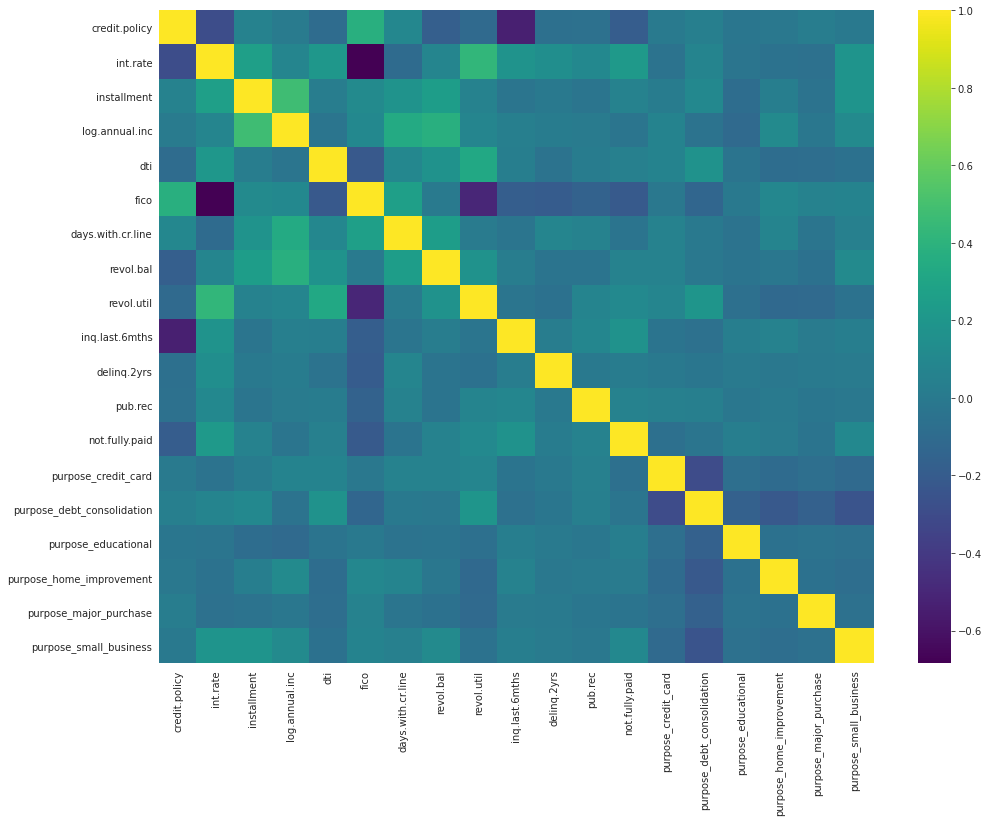

In [24]:
plt.figure(
        figsize=[16,12]
)
sns.heatmap(
        data=final_data.corr(), 
        cmap='viridis', 
        annot=False, 
        fmt='.2g'
)

<AxesSubplot:>

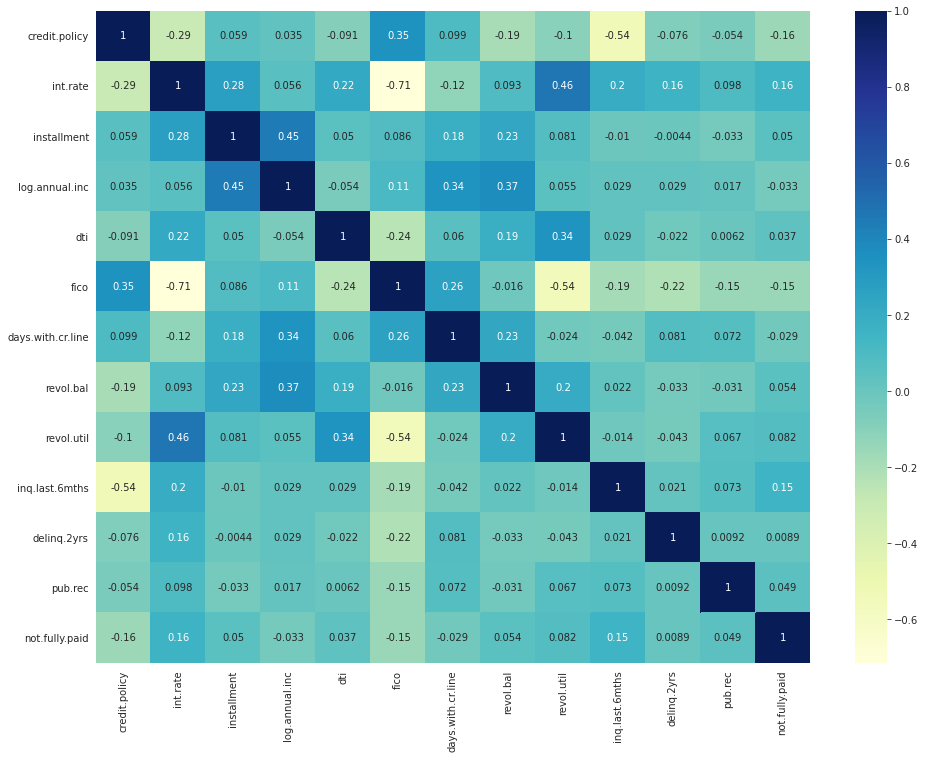

In [25]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [26]:
to_train = final_data[final_data['not.fully.paid'].isin([0,1])]
to_pred = final_data[final_data['not.fully.paid'] == 2]

X = to_train.drop('not.fully.paid', axis=1).values
y = to_train['not.fully.paid'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()

model.add(Dense(19, activation='relu'))

model.add(Dense(10, activation='relu'))

model.add(Dense(5, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

model.fit(X_train,y_train,epochs=200, batch_size=256, validation_data=(X_test, y_test),callbacks=[early_stop])

Epoch 1/200
44/44 [==============================] - 0s 6ms/step - loss: 0.7048 - accuracy: 0.5153 - val_loss: 0.6884 - val_accuracy: 0.5513
Epoch 2/200
44/44 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.5693 - val_loss: 0.6813 - val_accuracy: 0.5848
Epoch 3/200
44/44 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.5987 - val_loss: 0.6759 - val_accuracy: 0.6014
Epoch 4/200
44/44 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.6119 - val_loss: 0.6700 - val_accuracy: 0.6033
Epoch 5/200
44/44 [==============================] - 0s 2ms/step - loss: 0.6598 - accuracy: 0.6175 - val_loss: 0.6601 - val_accuracy: 0.6031
Epoch 6/200
44/44 [==============================] - 0s 2ms/step - loss: 0.6493 - accuracy: 0.6215 - val_loss: 0.6547 - val_accuracy: 0.6049
Epoch 7/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6446 - accuracy: 0.6205 - val_loss: 0.6542 - val_accuracy: 0.6018
Epoch 8/200
4

<AxesSubplot:>

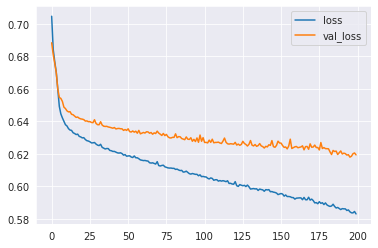

In [27]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot()

In [28]:
predictions =  model.predict_classes(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[[1676  761]
 [ 843 1547]]
              precision    recall  f1-score   support

           0       0.67      0.69      0.68      2437
           1       0.67      0.65      0.66      2390

    accuracy                           0.67      4827
   macro avg       0.67      0.67      0.67      4827
weighted avg       0.67      0.67      0.67      4827



In [29]:
model_new = Sequential()

model_new.add(Dense(19, activation='relu'))

model_new.add(Dropout(0.2))

model_new.add(Dense(10, activation='relu'))

model_new.add(Dropout(0.2))

model_new.add(Dense(5, activation='relu'))

model_new.add(Dropout(0.2))

model_new.add(Dense(1, activation='sigmoid'))

model_new.compile(optimizer='adam',loss='binary_crossentropy',metrics=['binary_accuracy'])

model_new.fit(X_train,y_train,epochs=200,batch_size=256,validation_data=(X_test, y_test),callbacks=[early_stop])

Epoch 1/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6943 - binary_accuracy: 0.5092 - val_loss: 0.6904 - val_binary_accuracy: 0.5560
Epoch 2/200
44/44 [==============================] - 0s 2ms/step - loss: 0.6887 - binary_accuracy: 0.5372 - val_loss: 0.6852 - val_binary_accuracy: 0.5811
Epoch 3/200
44/44 [==============================] - 0s 7ms/step - loss: 0.6825 - binary_accuracy: 0.5605 - val_loss: 0.6764 - val_binary_accuracy: 0.5937
Epoch 4/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6769 - binary_accuracy: 0.5659 - val_loss: 0.6693 - val_binary_accuracy: 0.6051
Epoch 5/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6721 - binary_accuracy: 0.5854 - val_loss: 0.6652 - val_binary_accuracy: 0.6039
Epoch 6/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6702 - binary_accuracy: 0.5903 - val_loss: 0.6619 - val_binary_accuracy: 0.6053
Epoch 7/200
44/44 [==============================] - 0s 3ms/step - los

<AxesSubplot:>

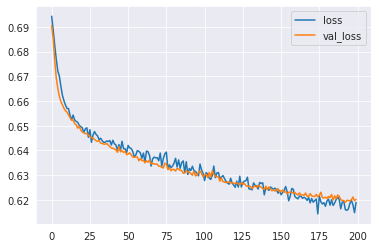

In [30]:
pd.DataFrame(model_new.history.history)[['loss','val_loss']].plot() 

In [31]:
predictions_new = (model_new.predict_proba(X_test) >= 0.2).astype('int')

print(
        confusion_matrix(y_test,predictions_new), 
        '\n', 
        classification_report(y_test,predictions_new)
)

Instructions for updating:
Please use `model.predict()` instead.
[[ 217 2220]
 [  21 2369]] 
               precision    recall  f1-score   support

           0       0.91      0.09      0.16      2437
           1       0.52      0.99      0.68      2390

    accuracy                           0.54      4827
   macro avg       0.71      0.54      0.42      4827
weighted avg       0.72      0.54      0.42      4827



In [32]:
dump(scaler, open('scaler.pkl', 'wb'))
model_new.save('model_lending_club.h5')

In [33]:
later_scaler = load(open('scaler.pkl', 'rb'))
later_model = load_model('model_lending_club.h5')

In [34]:
X_OOT = to_pred.drop('not.fully.paid', axis=1).values
to_pred.drop('not.fully.paid', axis=1).values

print(X_OOT.shape)

(0, 18)
